# **Business case:**

_Building a model to categorize the predominant diseases afflicting rice leaf, including leaf blast, bacterial blight, and brown spot_.

# **Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade keras

In [ ]:
import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# **Domain Analysis**

* _This dataset belongs to the domain of agricultural **image recognition**, specifically focusing on rice leaf disease classification._

* _The dataset aims to train the model to automatically identify and categorize the three main rice leaf diseases  **leaf smut, brown spot,** and **bacterial leaf blight**._

* _The dataset consists of **120 JPG images**, representing visual data of rice leaves infected with various diseases._

* _The data is balanced, with 40 images for each of the three disease classes. This is important for training machine learning models that require balanced representation of each category._

# **Data Reorganization**

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio(
    '/content/drive/MyDrive/Data_reorganized',
    output="split_data",
    seed=1337,
    ratio=(.8, 0.1, 0.1))

Copying files: 119 files [00:48,  2.46 files/s]


**INSIGHTS**

* _The **"Splitfolders.ratio"** function helps us to **split** the data into **training, validation,** and **test** sets."_

* _The code **"output"** used to Split the folders and where to save the split data here we saved as **"split_data"** folder_.

*  _And the **"seed"** code is optional it sets a seed value to ensure consistent splitting (same seed = same split on reruns)_.

* The **"ratio"** argument defines the proportions for each split for this dataset we splitted **0.8** for **training**, **0.1** for each of **validation** and **test**_.


# **Image Data Preparation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/Data_reorganized/train'
validation_dir = '/content/drive/MyDrive/Data_reorganized/val'
test_dir = '/content/drive/MyDrive/Data_reorganized/test'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

Found 95 images belonging to 3 classes.
Found 11 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


**INSIGHTS**

*  _We imported the **ImageDataGenerator** from **TensorFlow's Keras library** which helps us to prepare **Image data** for training the model_.

*  _We defined the variables for the **location** of our training, validation, and test data folders as **train_dir, validation_dir** and **test_dir**_.

*  _We created **three** ImageDataGenerator objects as **train_datagen, validation_datagen** and **test_datagen** to handle preprocessing for each data set. And we **Rescaled** pixel values (0-255) to a common range (0-1) for the model_.

*  _We set a  **batch size** as **16** to control the number of images fed to the model at each training step._

*  _We employed **flow_from_directory** on each ImageDataGenerator object to create generators **(train_generator, validation_generator, test_generator)**. These iterate over image data in batches, applying rescaling and handling class labels if applicable_.

*  _**Generator Configuration** each generator is configured with:_

    - _**Directory:** Path to the image directory._
    -  _**Target size:** Resizes images to a fixed size._
    -  _**Batch size:** Number of images per batch._
    -  _**Class mode** as **categorical** as optional and not mandatory to keep in the code snippet._

# **Visualizing Image with Class Labels**

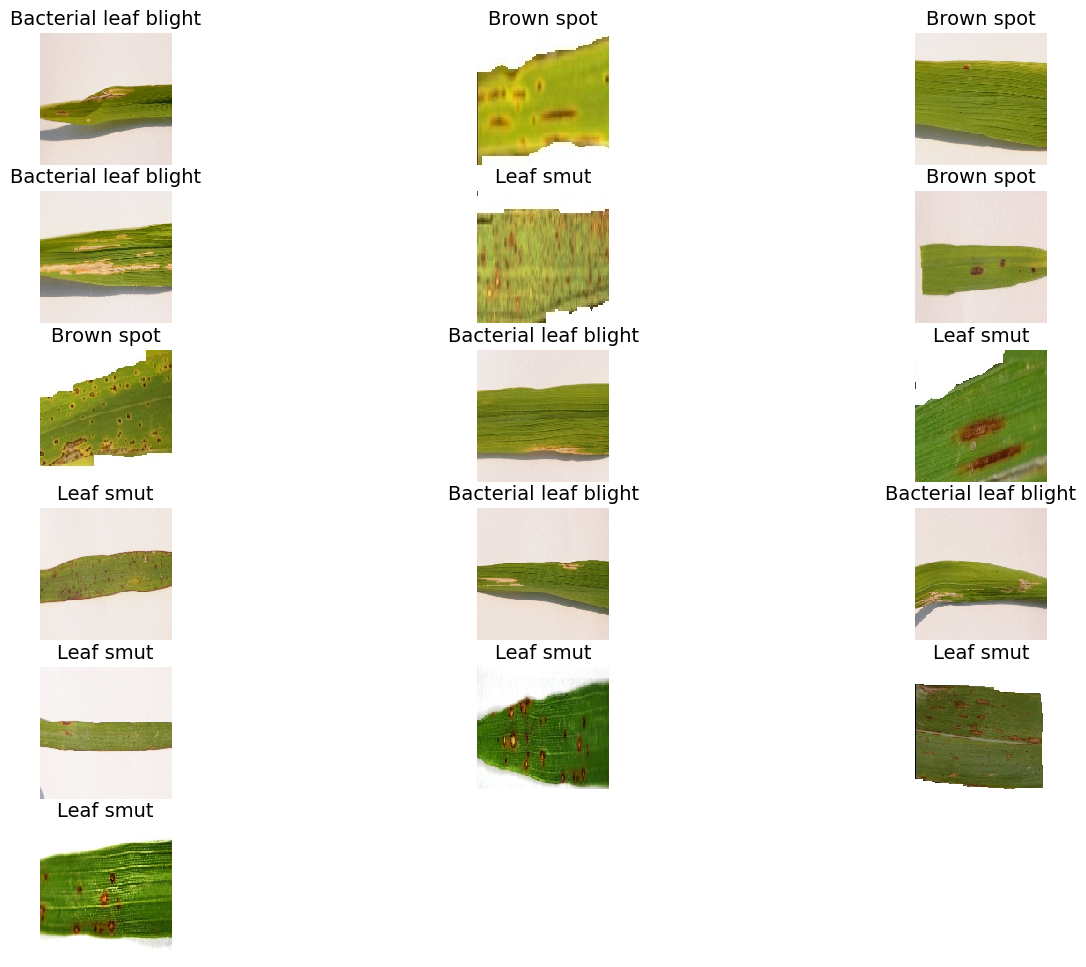

In [ ]:
def plots_with_labels(images, labels, class_names, figsize=(16, 12), rows=3, cols=3, interp=False):
    num_images = len(images)
    cols = min(cols, num_images)
    rows = (num_images + cols - 1) // cols
    plt.figure(figsize=figsize)
    for i in range(num_images):
        plt.subplot(rows, cols, i+1)
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=14)
        plt.imshow(images[i], interpolation=None if interp else 'none')
    plt.show()

imgs, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())
plots_with_labels(imgs, labels.argmax(axis=1), class_names)

**INSIGHTS**

*  _**plots_with_labels** This function visualizes a batch of images alongside their corresponding class labels._

*  _**num_images** determines the total number of images and **cols** this ensures the number of columns that doesn't exceed the total number of images Finally, **rows** it calculates the required number of rows  to display all images in the layout_.

* _For visualization we used **Matplotlib** for a cleaner presentation
and the image is displayed using **plt.imshow**. By default, interpolation is turned off **interp=None** for sharper images_.

*  _The code uses **next(train_generator)** to retrieve the next batch of data from the train_generator. This batch will contain two elements: a list of images as **imgs** and a list of labels as **labels**._

* _**class_names** which extracts a list of class names from the **train_generator.class_indices dictionary** and **labels.argmax(axis=1)** this converts the labels from potentially one-hot encoded format_

# **Building the CNN Model**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import models

model = models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,812,995 (25.99 MB)

 Trainable params: 6,812,995 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

**INSIGHTS**

* _We imported the necessary **layers** from **keras** for building the **CNN** model and **models.Sequential()** creates a sequential model object._

*  _**model.add(Conv2D(filters,kernel_size,activation))** use convolutional layers to extract features and **pooling layers** are used to reduce dimensionality, and **dense layers** for classification._

*  _**model.add(Flatten())** flattens the multi-dimensional output of the convolutional layers into a single feature vector_.

*  _**model.add(Dropout(rate=0.5))** introduces a **Dropout layer** with a rate of **0.5** This randomly drops **50% of the neurons** during training to prevent overfitting._

* _The final Desnse layer uses **softmax** activation to predict probabilities for multiple classes._


In [ ]:
new_optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=new_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4302 - loss: 1.0466 - val_accuracy: 0.3636 - val_loss: 1.1222
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4467 - loss: 1.0216 - val_accuracy: 0.3636 - val_loss: 1.0919
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 878ms/step - accuracy: 0.5196 - loss: 0.9939 - val_accuracy: 0.3636 - val_loss: 1.0494
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 898ms/step - accuracy: 0.6170 - loss: 0.9175 - val_accuracy: 0.3636 - val_loss: 1.0742
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5892 - loss: 0.8675 - val_accuracy: 0.3636 - val_loss: 1.0549
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 857ms/step - accuracy: 0.6678 - loss: 0.8458 - val_accuracy: 0.4545 - val_loss: 0.9866
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 859ms/step - accuracy: 0.6571 - loss: 0.7992 - val_accuracy: 0.5455 - val_loss: 1.0420
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 877ms/step - accuracy: 0.7093 - loss: 0.7820 - val_accuracy: 0.5455 - val_loss: 1.

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.5385 - loss: 0.8302
Test accuracy: 0.5384615659713745


**INSIGHTS**

*   _The code **Keras.optimizers** creates a new optimizer object using the **Adam optimizer** with a specific learning rate of **0.0001**. The optimizer guides how the model updates its weights during training to minimize the loss function._

*   _**epochs=30** specifies the number of training epochs. In each epoch, the model iterates through the entire training data once_

* _While the **model** achieved a **high training** accuracy of **95.37%**, its performance on unseen data is concerning. The **validation** accuracy of **63.64** and **test** accuracy of **53.84%** suggest potential overfitting._

# **Transfer Learning:**

* _Using a pre-trained model - VGG16_

In [ ]:
from keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.2885 - loss: 2.2875 - val_accuracy: 0.3636 - val_loss: 1.1366
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.5255 - loss: 1.0188 - val_accuracy: 0.6364 - val_loss: 0.8351
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.7255 - loss: 0.7585 - val_accuracy: 0.8182 - val_loss: 0.4229
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.7903 - loss: 0.5335 - val_accuracy: 0.9091 - val_loss: 0.3506
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.9061 - loss: 0.2834 - val_accuracy: 0.8182 - val_loss: 0.4114
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.9146 - loss: 0.2633 - val_accuracy: 0.9091 - val_loss: 0.2671
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.9634 - loss: 0.2127 - val_accuracy: 1.0000 - val_loss: 0.2249
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9611 - loss: 0.1823 - val_accuracy: 1.0000 - val_loss: 0.2216
Epoch 9/

In [ ]:
evaluation_metrics = model.evaluate(test_generator)
print("Test Loss:", evaluation_metrics[0])
print("Test Accuracy:", evaluation_metrics[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.2080
Test Loss: 0.20802101492881775
Test Accuracy: 1.0


INSIGHTS

* _Here we used the **pre-trained VGG16 model**, which has learned valuable features from a massive image dataset **(ImageNet)**. These features can be beneficial for **recognizing shapes, textures,** and **edges** relevant to **rice leaf disease detection**, even if the objects themself were different._

*  _By using **pre-trained weights**, the model focuses on learning the final classification layers specific to rice diseases. This significantly **reduces training time** compared to building a model from scratch._


* _Our model achieved high accuracy **97.18% on training** data, and perfect scores **100%** on both **validation** and **testing** data._

# **Visualization with training and validation loss**

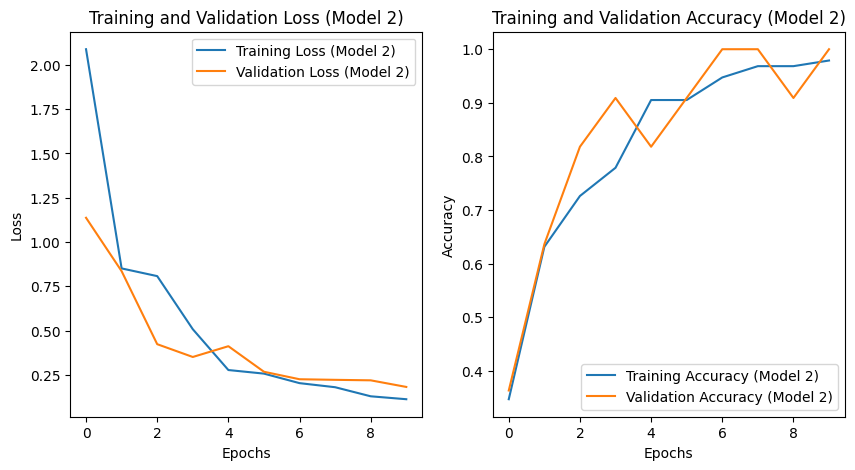

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (Model 2)')
plt.plot(history.history['val_loss'], label='Validation Loss (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Model 2)')
plt.legend()

# Plotting training and validation accuracy for the second model
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy (Model 2)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Model 2)')
plt.legend()
plt.show()

# **Visual Representation**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


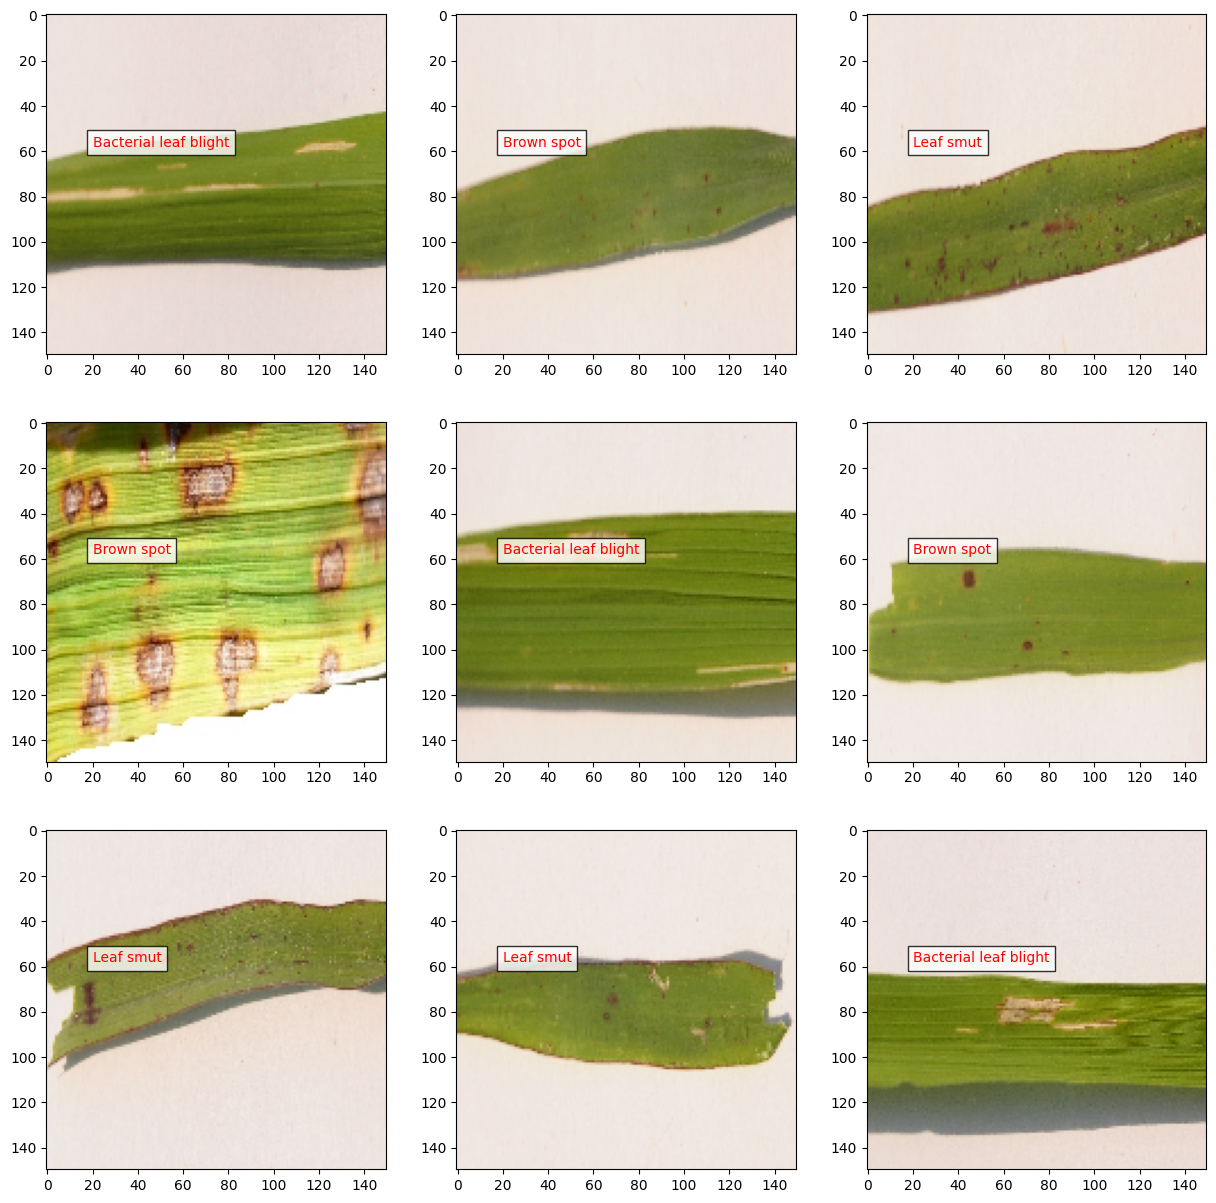

In [ ]:
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])

In [ ]:
model.save('my_model.keras')

**INSIGHTS**

* _**test_generator** feeds batches of images and labels This will gets the next batch and separates images (imgs) and labels._

* _**Looping Through Images** with the help of loop The code iterates through each subplot position._

*  _Inside the loop, it **predicts** the class for the image, extracts the most likely class label, and displays it as red text on a white box within the subplot_.

*  _Finally we save the model as **my_model.keras**_.


# **Model Comparison**


In [ ]:
from tabulate import tabulate

metrics = {
    'CNN': {'Training accuracy': 0.95, 'Validation accuracy': 0.63, 'Testing accuracy': 0.53},
    'MODEL - VGG16': {'Training accuracy': 0.97, 'Validation accuracy': 1.0, 'Testing accuracy': 1.0}
}

table_data = []
headers = ['Model', 'Training', 'Validation', 'Testing']

for model, report in metrics.items():

    training_accuracy = report['Training accuracy']
    validation_accuracy = report['Validation accuracy']
    testing_accuracy = report['Testing accuracy']
    table_data.append([model, training_accuracy, validation_accuracy, testing_accuracy])

print(tabulate(table_data, headers=headers, tablefmt='fancy_grid'))

╒═══════════════╤════════════╤══════════════╤═══════════╕
│ Model         │   Training │   Validation │   Testing │
╞═══════════════╪════════════╪══════════════╪═══════════╡
│ CNN           │       0.95 │         0.63 │      0.53 │
├───────────────┼────────────┼──────────────┼───────────┤
│ MODEL - VGG16 │       0.97 │         1    │      1    │
╘═══════════════╧════════════╧══════════════╧═══════════╛


**INSIGHTS**
*   _A **model comparison report** helps us to see whether which model **performs the best**_.

*   _By analyzing the various factors and how each model weighs, we gain a deeper understanding of **decision-making** processes, ultimately allowing us to make more **strategic choices**._

*   _Based on our model comparison, **MODEL - VGG16** an  CNN architecture appears to be the **most promising model**_.

*   _Our model achieved Training accuracy as **97.18%** and both validation and testing accuracy as **100%**_

# **Challenges Faced**

1. _**Importing Images**: While we can easily handle rows and columns in traditional datasets, importing this image dataset entirely proves difficult due to its specific format._

2. _**Image Processing for Deep Learning**: Processing images for deep learning can be complex. To address this, we opted to leverage an image generator_.

3. _**Data Splitting**: Splitting the image data into training, validation, and testing sets presents a challenge. Creating paths and handling the process can be cumbersome. Thankfully, TensorFlow's tf.keras.preprocessing.image.ImageDataGenerator simplifies this task_.

4. _**Model Selection**: While data augmentation techniques exist, we chose to employ a Convolutional Neural Network (CNN) with a pre-trained VGG16 model for potentially better results._

# **Conclusion**

* _Despite limitations in data size, this well-balanced dataset of 120 rice leaf disease images **(categorized into leaf smut, brown spot, and bacterial leaf blight)** holds significant promise for developing **robust disease classification** models._

*  _Techniques like **transfer learning** offer solutions to overcome these hurdles_.

* _By harnessing this dataset's potential, it empower with early disease detection tools, paving the way for **improved crop health**, yield optimization, and sustainable agricultural practices._